In [1]:
from sklearn import datasets, neighbors, metrics
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [8]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names) #data needs to prepared to get the right values
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predictions
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000,1.006667
std,0.828066,0.433594,1.764420,0.763161,0.819232,0.823291
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000


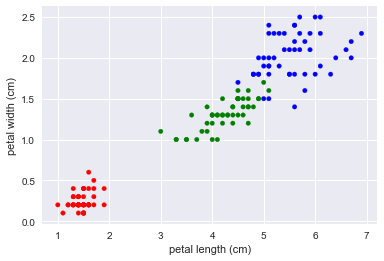

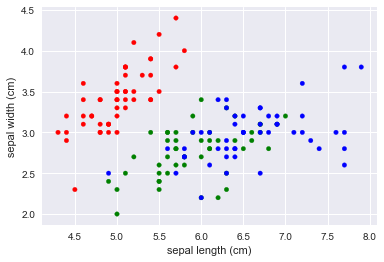

In [23]:
irisdf['target'] = iris.target
cmap = {'0': 'r', '1': 'g', '2': 'b' }##creating a dictionary with index 0,1,2 and content r,g,b
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)]) # applying the cmap dictionary to the 
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
irisdf.plot('sepal length (cm)', 'sepal width (cm)', kind='scatter', c=irisdf.ctarget)
irisdf.describe()

In [24]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,ctarget,predictions
0,5.1,3.5,1.4,0.2,0,r,0
1,4.9,3.0,1.4,0.2,0,r,0
2,4.7,3.2,1.3,0.2,0,r,0
3,4.6,3.1,1.5,0.2,0,r,0
4,5.0,3.6,1.4,0.2,0,r,0


Axes(0.125,0.125;0.775x0.755)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  predictions  
count        150.000000  150.000000   150.000000  
mean           1.198667    1.000000     0.973333  
std            0.763161    0.819232     0.802234  
min            0.100000    0.000000     0.000000  
25%            0.300000    0.000000     0.000000  
50%            1.300000    1.000000     1.000000  
75%            1.800000    

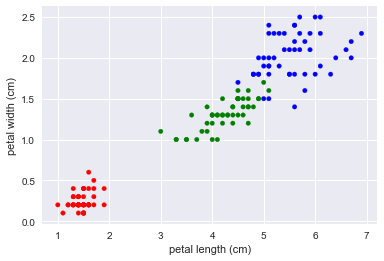

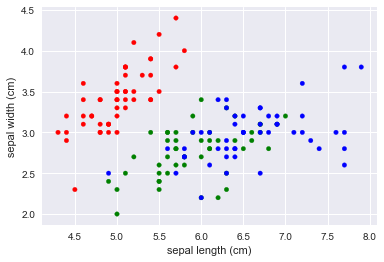

In [16]:


def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    elif row ['petal length (cm)'] >=4.9: #2 and row ['petal length (cm)'] <4.9:
        return 2 
    else:
        return 1

predictions = irisdf.apply(my_classifier, axis=1)

In [17]:
irisdf['predictions'] = predictions

print(float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf))

0.9533333333333334


### Starter Code

Work on improving the classifier below.

In [ ]:
## I amended the original code above... 
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 2

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print(float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf))

### Using distance: KNN implementation

In [25]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

iris = datasets.load_iris()
# n_neighbors =K. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform') # weights, uniform = evenly consider each neighbour.
                                                                    #distance = applying weighting based on the distance from K
knn.fit(iris.data[:,2:], iris.target) #fit function is the same for regression and classification.
print(knn.predict(iris.data[:,2:])) # print prediction based on the last two columns which contain petal length and petal width
print(iris.target) # print actuals

print(knn.score(iris.data[:,2:], iris.target)) #print accuracy 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.96


Do we see a change in performance when using the distance weight?

In [34]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') # add in the weights parameter here
knn.fit(iris.data[:,2:], iris.target)
print(knn.predict(iris.data[:,2:]))
print(iris.target)

print(knn.score(iris.data[:,2:], iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.993333333333


Distance weighting improves the accuracy from 96% to 99% 

In [62]:

k_values = range(1,20)
weights_values = ['distance','uniform']
scores = []
for k in k_values:           # there are two "for" loops here, so it starts with K 1 distance, then K2 uniform
    for w in weights_values: # so each odd row in scores uses distance, and each even row uses uniform  
        knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights=w)
        knn.fit(iris.data[:,2:], iris.target)
        scores.append(knn.score(iris.data[:,2:], iris.target))
        
print(scores)

[0.99333333333333329, 0.99333333333333329, 0.98666666666666669, 0.97333333333333338, 0.99333333333333329, 0.97999999999999998, 0.99333333333333329, 0.97333333333333338, 0.99333333333333329, 0.95999999999999996, 0.99333333333333329, 0.96666666666666667, 0.99333333333333329, 0.96666666666666667, 0.99333333333333329, 0.96666666666666667, 0.99333333333333329, 0.95999999999999996, 0.99333333333333329, 0.95999999999999996, 0.99333333333333329, 0.95999999999999996, 0.99333333333333329, 0.95999999999999996, 0.99333333333333329, 0.96666666666666667, 0.99333333333333329, 0.95999999999999996, 0.99333333333333329, 0.95999999999999996, 0.99333333333333329, 0.95999999999999996, 0.99333333333333329, 0.95999999999999996, 0.99333333333333329, 0.95999999999999996, 0.99333333333333329, 0.95999999999999996]


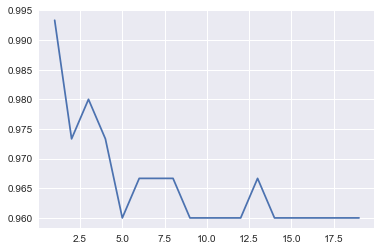

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel = 'K'
plt.plot(k_values,scores[1::2],)# this is saying start on the 1st row and step 2 
                                # i.e. return all odd rows which is using distance



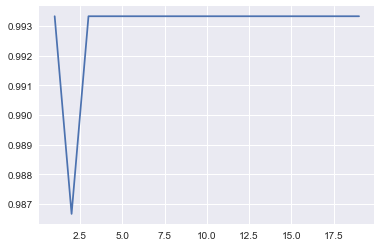

In [47]:
plt.plot(k_values,scores[0::2],)# this is plotting all even rows aka uniform

In [48]:

iris = datasets.load_iris()
# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(iris.data[:,2:], iris.target)

irisdf = pd.DataFrame({'target':iris.target,'prediction':knn.predict(iris.data[:,2:])})

#Precision is the number of True Positives divided by the number of True Positives and False Positives
print(len(irisdf[(irisdf.target == irisdf.prediction)&(irisdf.target == 2)])/
len(irisdf[(irisdf.prediction == 2)])) 

#Recall is the number of True Positives divided by the number of True Positives and the number of False Negatives.
print(len(irisdf[(irisdf.target == irisdf.prediction)&(irisdf.target == 2)])/
len(irisdf[(irisdf.target == 2)])) #Recall

0.9803921568627451
1.0


### Solution to solving K

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive. Note the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [67]:
import numpy as np 
from sklearn import grid_search, cross_validation
import matplotlib.pyplot as plt

# some n_list! keep in mind cross validation
k=np.arange(1,12)
params = {'n_neighbors':k,'weights':['distance','uniform']} #the name of each parameter needs to be a recognised component of the KNeighborsClassifier() model

kf = cross_validation.KFold(len(irisdf), n_folds = 5) #cross validation splits your training set to prevent overfitting.
gs = grid_search.GridSearchCV(               #grid search searches through each combination 
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=5,
    #verbose=10 #this returns more results to gridscores, with this line it will return each K, for each weight for each fold.
                # without it, it will show for each k and each weight... aggregated folds
)
gs.fit(iris.data, iris.target)
gs.grid_scores_

[mean: 0.96000, std: 0.02494, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.96000, std: 0.02494, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.02494, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.94667, std: 0.03399, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96667, std: 0.02108, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.02108, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.02108, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.97333, std: 0.01333, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.03651, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.97333, std: 0.02494, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.98000, std: 0.01633, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.98000, std: 0.01633, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.98000, std: 0.01633, para

So we can use the results above to find out which settings give the greatest accuracy.
Using distance and 10 neighbours seems to be the best solution.

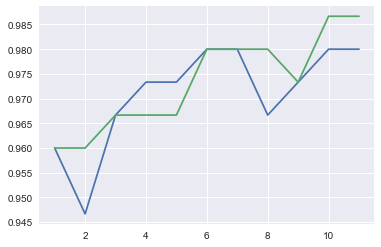

In [72]:
plt.plot(k,[s[1] for s in gs.grid_scores_[1::2]],) # odd rows = distance 
plt.plot(k,[s[1] for s in gs.grid_scores_[0::2]],) # even rows = uniform